<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge%202023/2.%20MNIST%20Image%20Classification/%232%20IBMQ%20QASM%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting


In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install matplotlib
!pip install numpy

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate, SwapGate, RXGate
from qiskit.circuit.library import UnitaryGate

In [ ]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

In [ ]:
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

sampler = Sampler(backend=backend)

#1. Product State Encoding to 8 Qubits

Encoding [1, 5, 2, 6, 3, 7, 4, 8] to 8 Qubits



/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


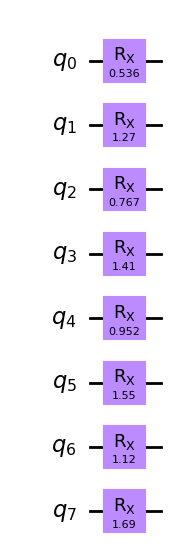

In [ ]:
# Initial Setting
order = [0,1,2,3,4,5,6,7]
vector = [1,5,2,6,3,7,4,8]
norm = np.linalg.norm(vector)
Probability_1_List = []

# Circuit Setting
Eight_Qubits_Quantum_Register = QuantumRegister(8, 'q')
Eight_Qubits_Encoding = QuantumCircuit(Eight_Qubits_Quantum_Register)

# Single Rotation Matrix Implement
for j in range(8) :
  Eight_Qubits_Encoding.rx(2*np.arcsin(np.sqrt(vector[j]/norm)), Eight_Qubits_Quantum_Register[j])

# Circuit Drawing
Eight_Qubits_Encoding.draw("mpl")

Verifying Encoding : Measurement of Probabiltiy 1

[1.0093694940902465, 5.003570414174263, 1.994743788660589, 6.007369594090245, 2.985402740268053, 6.9948863171891515, 4.00991206262681, 8.016967553882203]


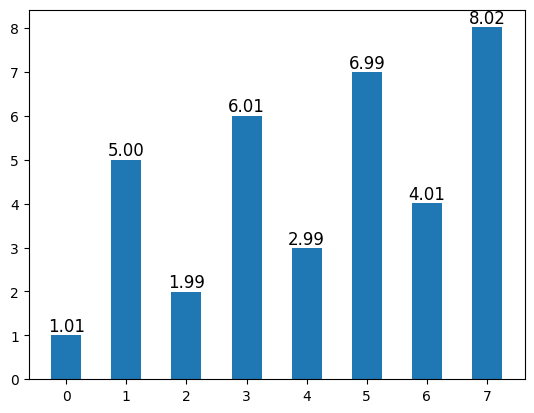

In [ ]:
# Initial Setting
order = [0,1,2,3,4,5,6,7]
vector = [1,5,2,6,3,7,4,8]
norm = np.linalg.norm(vector)
Probability_1_List = []

for i in range(8) :
  # Circuit Setting
  Eight_Qubits_Quantum_Register = QuantumRegister(8, 'q')
  Eight_Qubits_Classical_Register = ClassicalRegister(8, 'c')
  Eight_Qubits_Encoding = QuantumCircuit(Eight_Qubits_Quantum_Register, Eight_Qubits_Classical_Register)

  # Single Rotation Matrix Implement
  for j in range(8) :
    Eight_Qubits_Encoding.rx(2*np.arcsin(np.sqrt(vector[j]/norm)), Eight_Qubits_Quantum_Register[j])

  # Measurement on ith qubit
  Eight_Qubits_Encoding.measure(Eight_Qubits_Quantum_Register[i], Eight_Qubits_Classical_Register[i])

  # Probability of measuring 1 on ith qubit
  job = sampler.run(Eight_Qubits_Encoding, shots=100000)
  result = job.result()

  counts = dict(result.quasi_dists[0])
  Probability_1_List.append(norm*counts[np.power(2,i)])

# Probabiltiy Bar Plot
print(Probability_1_List)

bar = plt.bar(order, Probability_1_List, 0.5)
plt.xticks(order)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()

#2. Encoding to 3 Qubits

Encoding [1, 5, 2, 6, 3, 7, 4, 8] to 3 Qubits

[0.07001400420140048, 0.3500700210070024, 0.14002800840280097, 0.42008402520840293, 0.21004201260420147, 0.4900980294098034, 0.28005601680560194, 0.5601120336112039]
[-0.9805806756909202, 0.19611613513818404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, -0.9486832980505138, 0.31622776601683794, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, -0.9191450300180578, 0.39391929857916763, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.8944271909999159, 0.4472135954999579]
[-0.1703748109239964, -0.8518740546199819, 0.0, 0.0, 0.0, 0.0, 0.2214872542011953, 0.4429745084023906]
[0.05083942560314576, 0.2541971280157288, -0.26944895569667254, -0.8083468670900176, 0.0, 0.0, 0.20335770241258305, 0.4067154048251661]
[0.044128837330927095, 0.22064418665463548, 0.08825767466185419, 0.26477302398556257, -0.33324880605079427, -0.7775805474518533, 0.17651534932370838, 0.35303069864741676]
[[0.07001400420140048, -0.9805806756909202, 0.0, 0.0, 0.0, -0.1703748109239964, 0.05083942560314576, 0.044128837330927095], [0.350070

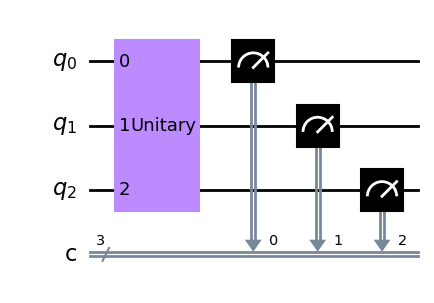

In [ ]:
# Matrix Setting
vector1 = [1, 5, 2, 6, 3, 7, 4, 8]
vector2 = [-5, 1, 0, 0, 0, 0, 0, 0]
vector3 = [0, 0, -6, 2, 0, 0, 0, 0]
vector4 = [0, 0, 0, 0, -7, 3, 0, 0]
vector5 = [0, 0, 0, 0, 0, 0, -8, 4]
vector6 = [-1, -5, 0, 0, 0, 0, 1.3, 2.6]
vector7 = [10/53, 50/53, -1, -3, 0, 0, 40/53, 80/53]
vector8 = [290/73, 1450/73, 580/73, 1740/73, -30, -70, 1160/73, 2320/73]

v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
v6 = []
v7 = []
v8 = []
for i in range(8):
  v1.append(vector1[i]/np.linalg.norm(vector1))
  v2.append(vector2[i]/np.linalg.norm(vector2))
  v3.append(vector3[i]/np.linalg.norm(vector3))
  v4.append(vector4[i]/np.linalg.norm(vector4))
  v5.append(vector5[i]/np.linalg.norm(vector5))
  v6.append(vector6[i]/np.linalg.norm(vector6))
  v7.append(vector7[i]/np.linalg.norm(vector7))
  v8.append(vector8[i]/np.linalg.norm(vector8))

matrix = []
print(v1)
print(v2)
print(v3)
print(v4)
print(v5)
print(v6)
print(v7)
print(v8)
for i in range(8):
  matrix.append([v1[i], v2[i], v3[i], v4[i], v5[i], v6[i], v7[i], v8[i]])

print(matrix)
gate = UnitaryGate(matrix)

# Circuit Setting
Three_Qubits_Quantum_Register = QuantumRegister(3, 'q')
Three_Qubits_Classical_Register = ClassicalRegister(3, 'c')
Three_Qubits_Encoding = QuantumCircuit(Three_Qubits_Quantum_Register, Three_Qubits_Classical_Register)

# Single Rotation Matrix Implement
Three_Qubits_Encoding.append(gate, [0, 1, 2])
Three_Qubits_Encoding.measure([0, 1, 2], [0, 1, 2])

# Circuit Drawing
Three_Qubits_Encoding.draw("mpl")

Verifying Encoding : Measurement of Probability of Each State

>>> Job ID: cldku7dlqrutvh1ag3m0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01954, 1: 0.123, 5: 0.24047, 0: 0.00482, 3: 0.17517, 7: 0.31475, 6: 0.07809, 4: 0.04416}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01954, 1: 0.123, 5: 0.24047, 0: 0.00482, 3: 0.17517, 7: 0.31475, 6: 0.07809, 4: 0.04416}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


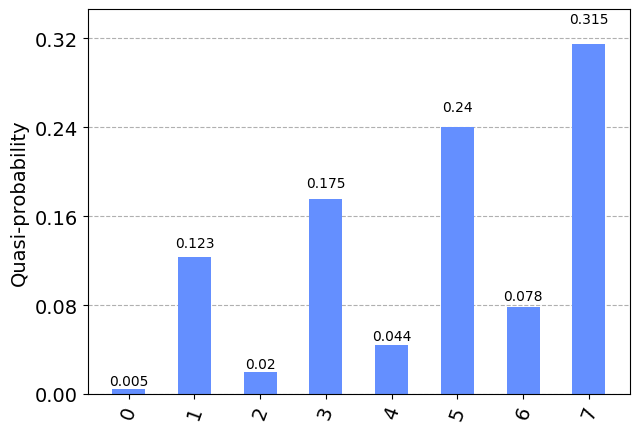

In [ ]:
# Circuit Running
job = sampler.run(Three_Qubits_Encoding, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

[0.9916047599724398, 5.0091915515380325, 1.996537001911059, 5.977849111511598, 3.0014396545657887, 7.003990291255407, 3.9912855072019098, 8.013051853070715]


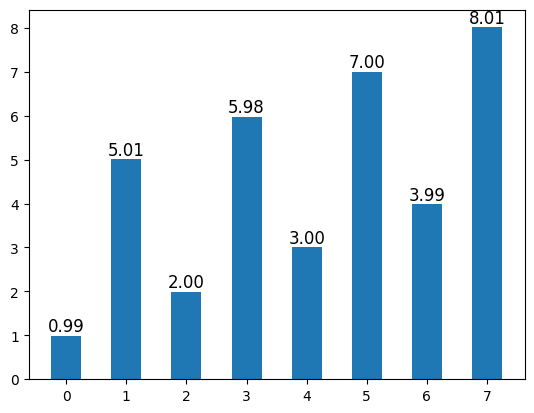

In [ ]:
Encoded_List = []
for i in range(8):
  Encoded_List.append(np.linalg.norm(vector1)*np.sqrt(counts[i]))

# Probabiltiy Bar Plot
print(Encoded_List)

bar = plt.bar([0,1,2,3,4,5,6,7], Encoded_List, 0.5)
plt.xticks([0,1,2,3,4,5,6,7])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()

#3. Enhanced Encoding Method

1) Task 1 VS Task 2

Task 1

Pros  : Only 8 single rotating gates. Low cost in gate number.

Cons  : One-Hot encoding. 8 qubits are used. High cost in qubit number.

Task2

Pros  : Binary encoding. Only 3 qubits used for encoding. Low cost in qubit number.

Cons  : too much gates to construct accurate unitary matrix whose probability of each state is equal to normalized vector's entry.

2) Enhanced Encoding Method

Constructing Enhanced Encoding

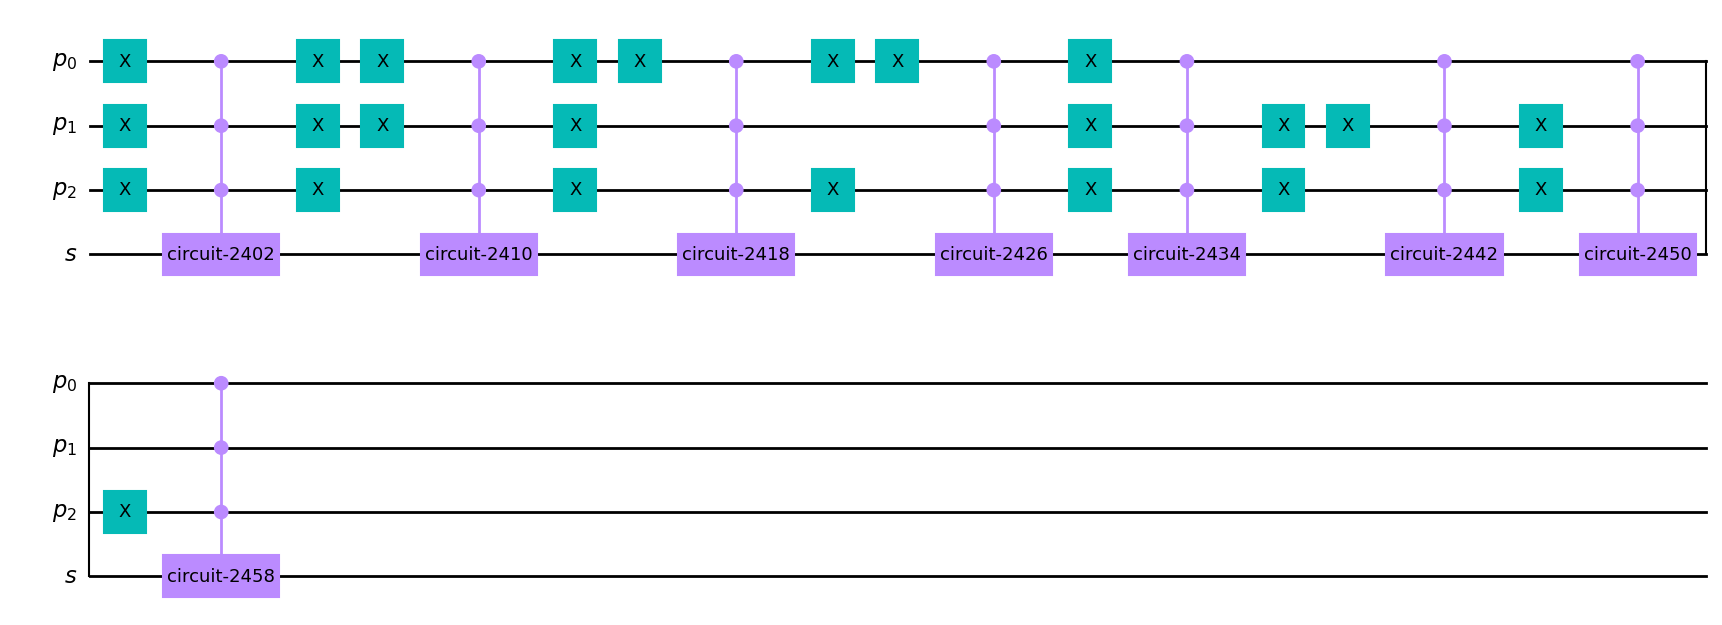

In [ ]:
# Initial Setting
order = [0,1,2,3,4,5,6,7]
vector = [1,5,2,6,3,7,4,8]
norm = np.linalg.norm(vector)

# Circuit Setting
Position_Qubits = QuantumRegister(3, 'p')
Probability_Qubit = QuantumRegister(1, 's')
Four_Qubits_Encoding = QuantumCircuit(Position_Qubits, Probability_Qubit)

s = Probability_Qubit
p0, p1, p2 = Position_Qubits

# Initial State

# Probability Qubit Rotating

Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[0]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[1]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[2]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[3]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[4]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

#Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
#Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[5]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

#Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
#Four_Qubits_Encoding.x(p0)
Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[6]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

#Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
#Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
Four_Qubits_Encoding.x(p2)


Rotate = QuantumCircuit(1)
Rotate.rx(2*np.arcsin(np.sqrt(vector[7]/norm)), 0)
Ugate = Rotate.to_gate().control(3)

#Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)
Four_Qubits_Encoding.append(Ugate, [p0, p1, p2, s])
#Four_Qubits_Encoding.x(p0)
#Four_Qubits_Encoding.x(p1)
#Four_Qubits_Encoding.x(p2)

# Circuit Drawing
Four_Qubits_Encoding.draw("mpl")

From State 000 ~ 111, Verifying Encoding : Probability X Norm is equal to each vector entry [1, 5, 2, 6, 3, 7, 4, 8]

In [ ]:
Decoded_Vector = []
Encoding = Four_Qubits_Encoding.to_gate()

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


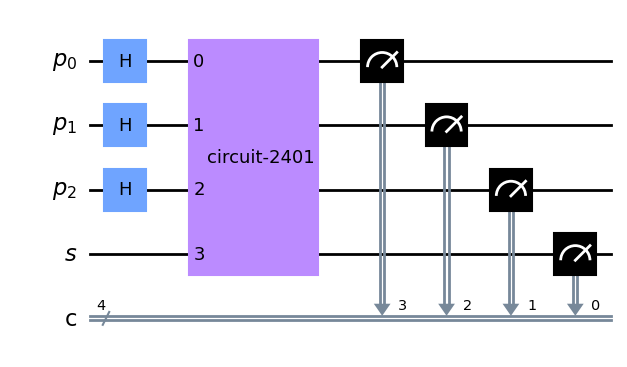

In [ ]:
# Circuit Setting
Position_Qubits = QuantumRegister(3, 'p')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Qubit = ClassicalRegister(4, 'c')
Four_Qubits_Measuring = QuantumCircuit(Position_Qubits, Probability_Qubit, Classical_Qubit)


# Produce Superposition State
Four_Qubits_Measuring.h(p0)
Four_Qubits_Measuring.h(p1)
Four_Qubits_Measuring.h(p2)
Four_Qubits_Measuring.append(Encoding, [0,1,2,3])
Four_Qubits_Measuring.measure([0,1,2,3], [3,2,1,0])

Four_Qubits_Measuring.draw("mpl")

>>> Job ID: cldo4oipen43j4797e40
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.02695, 5: 0.01735, 12: 0.08968, 11: 0.06135, 2: 0.08255, 1: 0.00893, 6: 0.07207, 4: 0.108, 8: 0.10112, 3: 0.0433, 7: 0.05158, 0: 0.11624, 13: 0.03407, 14: 0.05379, 10: 0.06333, 15: 0.06969}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.02695, 5: 0.01735, 12: 0.08968, 11: 0.06135, 2: 0.08255, 1: 0.00893, 6: 0.07207, 4: 0.108, 8: 0.10112, 3: 0.0433, 7: 0.05158, 0: 0.11624, 13: 0.03407, 14: 0.05379, 10: 0.06333, 15: 0.06969}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


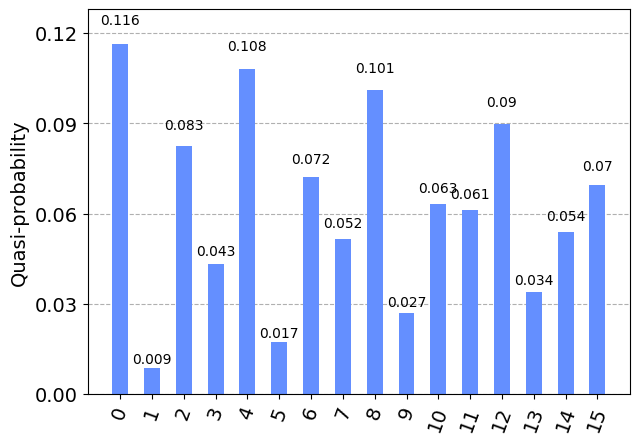

In [ ]:
job = sampler.run(Four_Qubits_Measuring, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

[1.0203672938702024, 4.947581615294487, 1.9824605317634953, 5.893678053507844, 3.0793839383876773, 7.010026145457662, 3.892935464967279, 7.96297835496242]


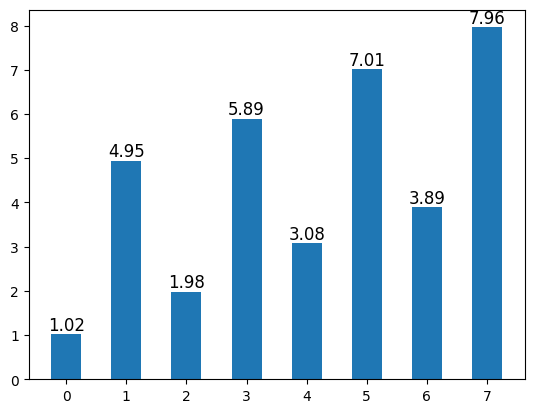

In [ ]:
for i in range(8):
  Decoded_Vector.append(8*norm*cnts[2*i+1])
print(Decoded_Vector)

bar = plt.bar([0,1,2,3,4,5,6,7], Decoded_Vector, 0.5)
plt.xticks([0,1,2,3,4,5,6,7])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()

#4. Encoding 3 X 3 Image

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


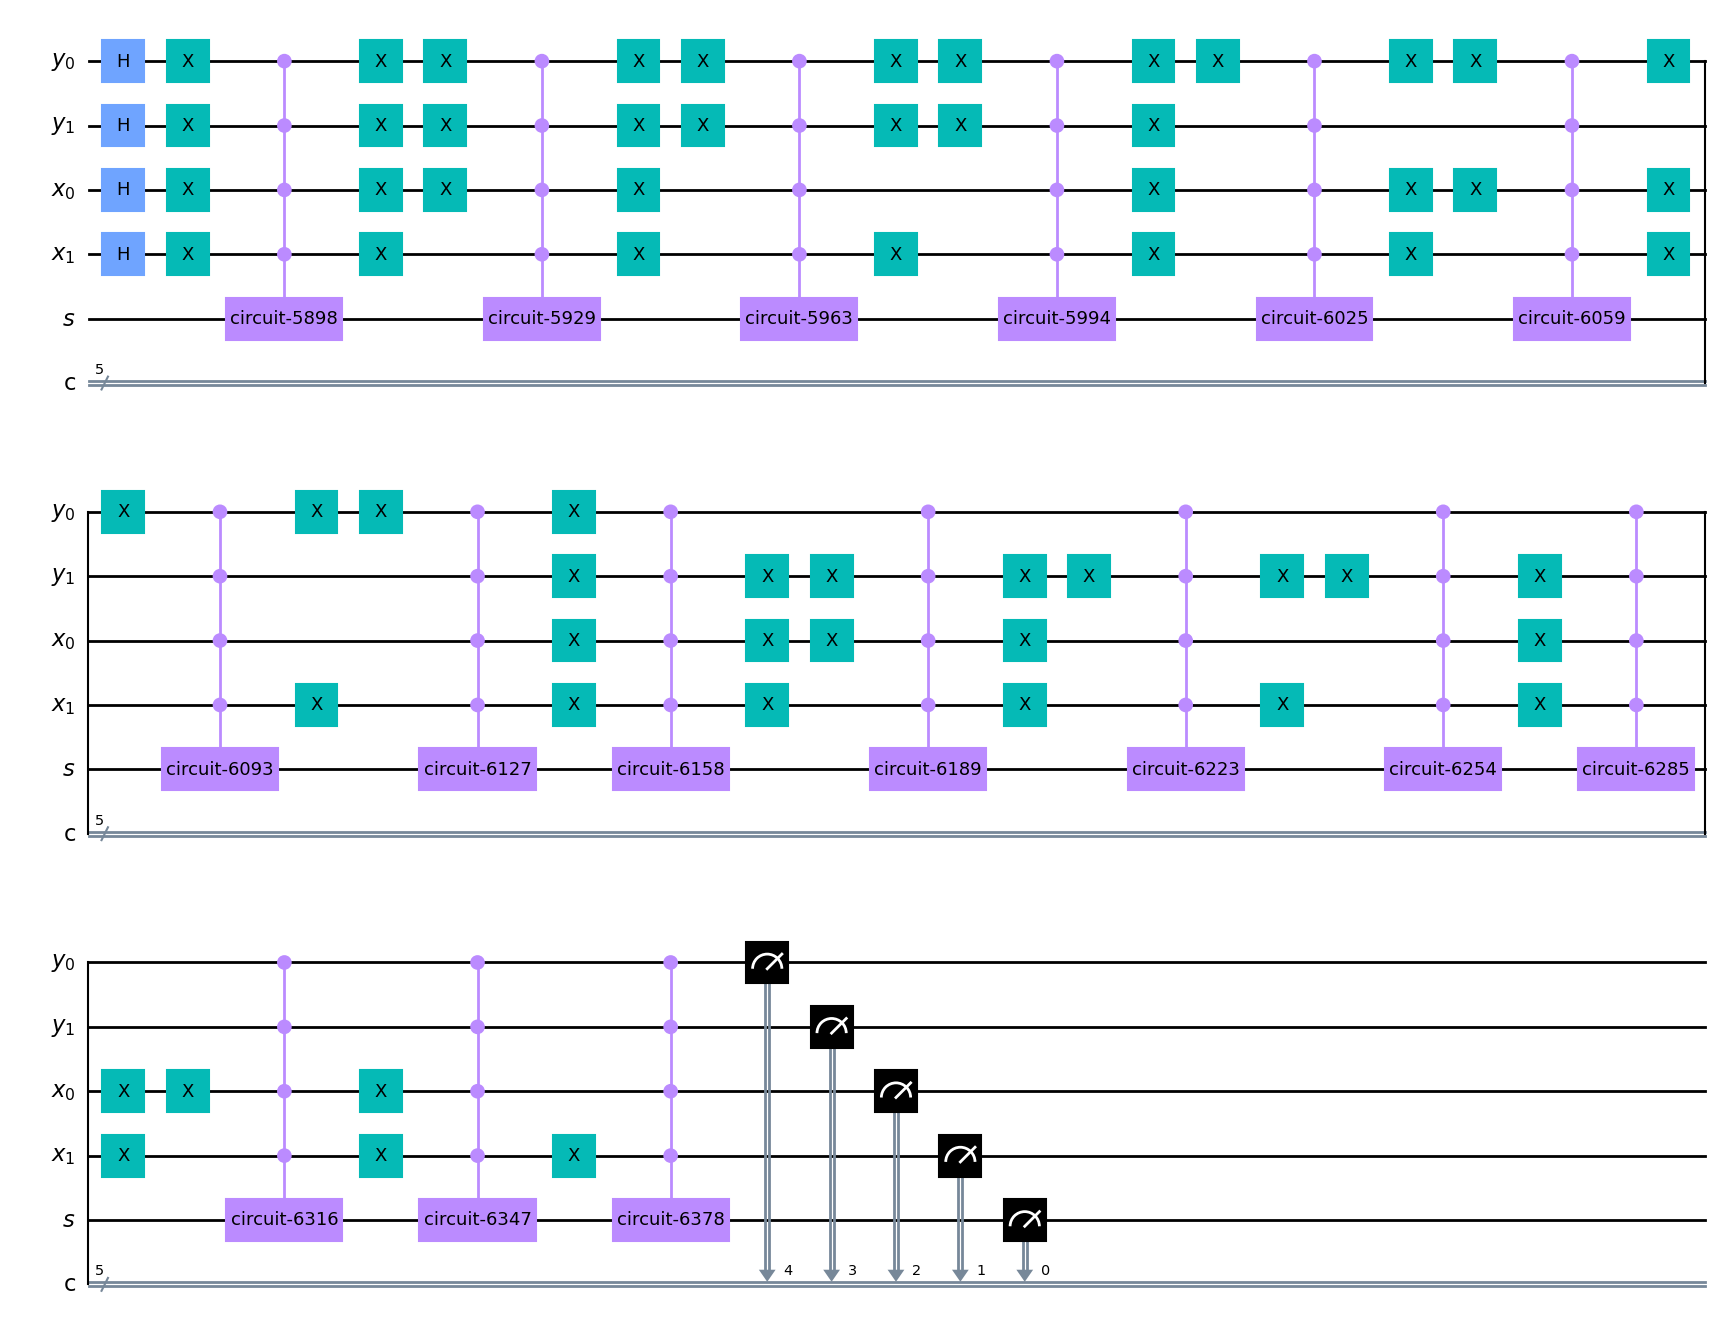

In [ ]:
# adding dummy pixels to make 4 X 4. Each row and columns 2 qubits.
matrix = [[0, 0.5, 0, 0],
          [0.8, 1, 0.8, 0],
          [0, 0.5, 0, 0],
          [0, 0, 0, 0]]

# Circuit Setting
Y_Qubits = QuantumRegister(2, 'y')
X_Qubits = QuantumRegister(2, 'x')
Probability_Qubit = QuantumRegister(1, 's')
Classical_Register = ClassicalRegister(5, 'c')
Five_Qubits_Encoding = QuantumCircuit(Y_Qubits, X_Qubits, Probability_Qubit, Classical_Register)

s = Probability_Qubit
y0, y1 = Y_Qubits
x0, x1 = X_Qubits

# Initial State
Five_Qubits_Encoding.h(y0)
Five_Qubits_Encoding.h(y1)
Five_Qubits_Encoding.h(x0)
Five_Qubits_Encoding.h(x1)

# Probability Qubit Rotating
for i in range(4):
  for j in range(4):
    Rotate = QuantumCircuit(1)
    Rotate.rx(2*np.arcsin(np.sqrt(matrix[i][j])), 0)
    Ugate = Rotate.to_gate().control(4)

    if i==0:
      Five_Qubits_Encoding.x(y0)
      Five_Qubits_Encoding.x(y1)
    elif i==1:
      Five_Qubits_Encoding.x(y0)
    elif i==2:
      Five_Qubits_Encoding.x(y1)
    else:
      pass

    if j==0:
      Five_Qubits_Encoding.x(x0)
      Five_Qubits_Encoding.x(x1)
    elif j==1:
      Five_Qubits_Encoding.x(x0)
    elif j==2:
      Five_Qubits_Encoding.x(x1)
    else:
      pass

    Five_Qubits_Encoding.append(Ugate, [y0, y1, x0, x1, s])

    if i==0:
      Five_Qubits_Encoding.x(y0)
      Five_Qubits_Encoding.x(y1)
    elif i==1:
      Five_Qubits_Encoding.x(y0)
    elif i==2:
      Five_Qubits_Encoding.x(y1)
    else:
      pass

    if j==0:
      Five_Qubits_Encoding.x(x0)
      Five_Qubits_Encoding.x(x1)
    elif j==1:
      Five_Qubits_Encoding.x(x0)
    elif j==2:
      Five_Qubits_Encoding.x(x1)
    else:
      pass

Five_Qubits_Encoding.measure([0,1,2,3,4], [4,3,2,1,0])

# Circuit Drawing
Five_Qubits_Encoding.draw("mpl")

>>> Job ID: cldok2lr12tet1qq9a8g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.01203, 16: 0.06207, 2: 0.03135, 9: 0.04971, 12: 0.01225, 6: 0.06294, 19: 0.0319, 18: 0.03066, 22: 0.0624, 20: 0.06309, 30: 0.063, 28: 0.06316, 4: 0.06259, 3: 0.03121, 11: 0.06222, 0: 0.06259, 13: 0.04959, 26: 0.06303, 14: 0.06249, 24: 0.06172}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.01203, 16: 0.06207, 2: 0.03135, 9: 0.04971, 12: 0.01225, 6: 0.06294, 19: 0.0319, 18: 0.03066, 22: 0.0624, 20: 0.06309, 30: 0.063, 28: 0.06316, 4: 0.06259, 3: 0.03121, 11: 0.06222, 0: 0.06259, 13: 0.04959, 26: 0.06303, 14: 0.06249, 24: 0.06172}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


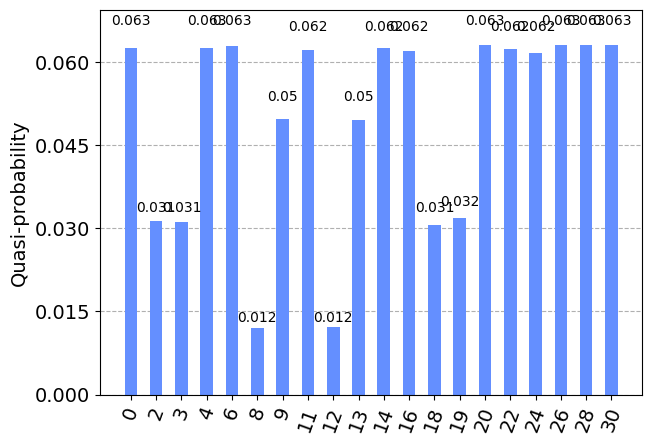

In [ ]:
job = sampler.run(Five_Qubits_Encoding, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

[0, 0.49936, 0, 0.79536, 0.99552, 0.79344, 0, 0.5104, 0]


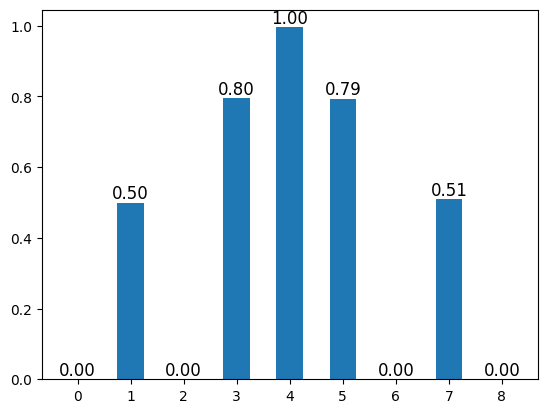

In [ ]:
# Store Decoded Matrix except for dummy entry
Decoded_Matrix = []
for i in range(16):
  if i%4==3:
    pass
  elif i>10:
    pass
  elif cnts.get(2*i+1)==None:
    Decoded_Matrix.append(0)
  else:
    Decoded_Matrix.append(16*cnts.get(2*i+1))
print(Decoded_Matrix)

bar = plt.bar([0,1,2,3,4,5,6,7,8], Decoded_Matrix, 0.5)
plt.xticks([0,1,2,3,4,5,6,7,8])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.show()